In [5]:
from ultralytics import YOLO
from PIL import Image

In [4]:
%ls

best.pt  frame_001_id_13_nitidez_7.30.jpg  teste.ipynb


In [6]:
model = YOLO('./best.pt')

In [7]:
import supervision as sv

image = Image.open("frame_001_id_13_nitidez_7.30.jpg")
result = model.predict(image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(result)



0: 384x640 1 cow, 41.0ms
Speed: 2.7ms preprocess, 41.0ms inference, 85.3ms postprocess per image at shape (1, 3, 384, 640)


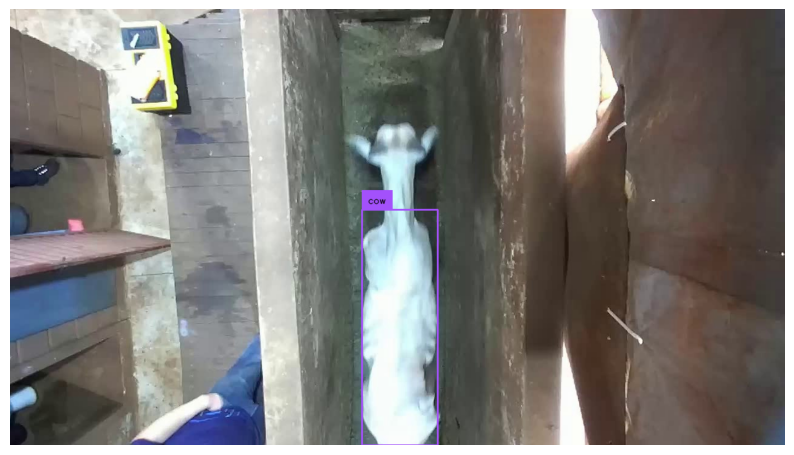

In [8]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))